# Data Cleaning and Exploratory Data Analysis (EDA)

This notebook performs data cleaning and exploratory data analysis (EDA) on the cruise ship dataset. It includes a function to clean the data for both Vessel 1 and Vessel 2, which can then be used in other notebooks for specific analyses.


## Exploratory Data Analysis (EDA)

### Step 1: Filter the Data

First, we filter the dataset to include only the necessary columns. WHY???


## Data Cleaning Function

We will create a function `clean_data` that takes in the raw data and returns cleaned data for Vessel 1 and Vessel 2.


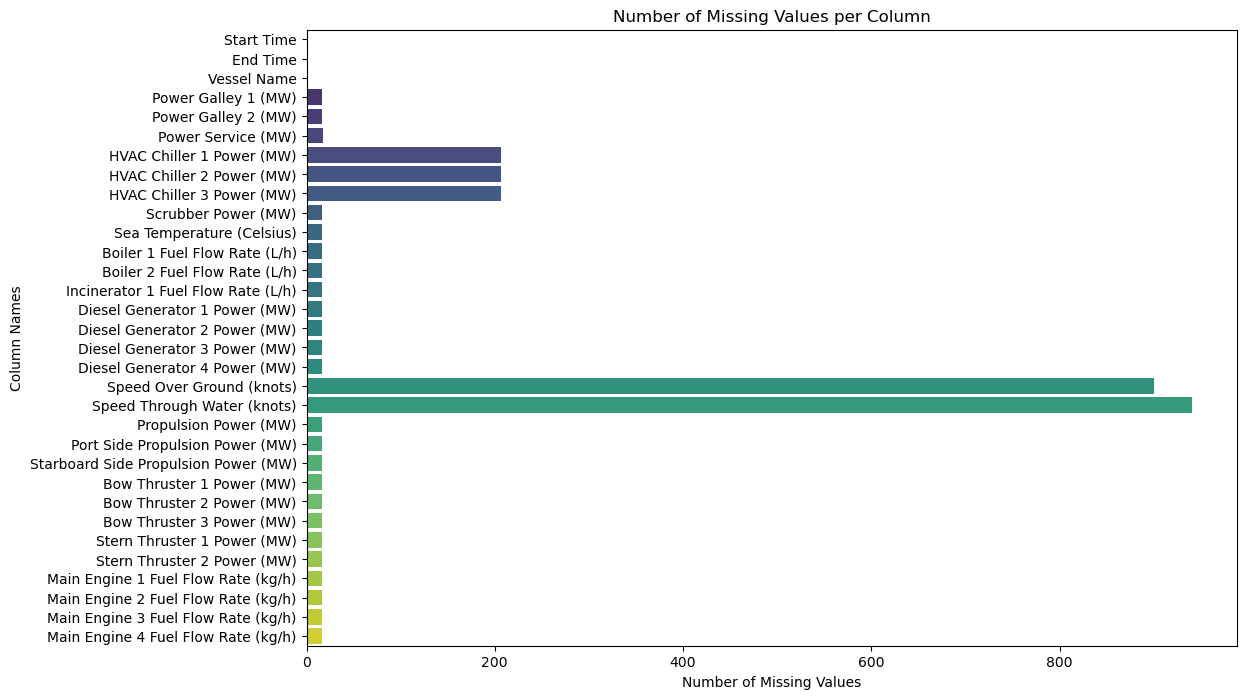

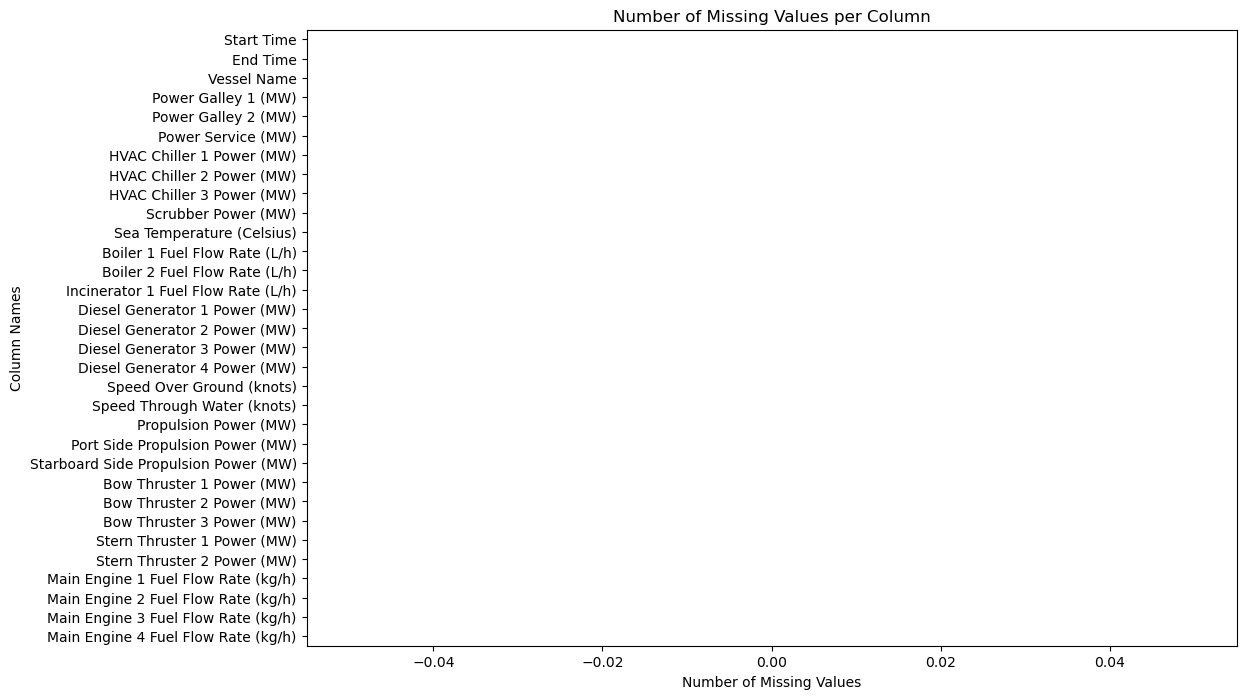

Data cleaning complete. Cleaned data saved for Vessel 1 and Vessel 2.


In [1]:
# Import necessary utilities

from utilities import *

# Define the necessary columns and date columns
necessary_columns = [
    'Start Time', 'End Time', 'Vessel Name',
    'Power Galley 1 (MW)', 'Power Galley 2 (MW)', 'Power Service (MW)',
    'HVAC Chiller 1 Power (MW)', 'HVAC Chiller 2 Power (MW)', 'HVAC Chiller 3 Power (MW)',
    'Scrubber Power (MW)', 'Sea Temperature (Celsius)',
    'Boiler 1 Fuel Flow Rate (L/h)', 'Boiler 2 Fuel Flow Rate (L/h)',
    'Incinerator 1 Fuel Flow Rate (L/h)', 'Diesel Generator 1 Power (MW)',
    'Diesel Generator 2 Power (MW)', 'Diesel Generator 3 Power (MW)',
    'Diesel Generator 4 Power (MW)',
    'Speed Over Ground (knots)', 'Speed Through Water (knots)',
    'Propulsion Power (MW)', 'Port Side Propulsion Power (MW)',
    'Starboard Side Propulsion Power (MW)', 'Bow Thruster 1 Power (MW)',
    'Bow Thruster 2 Power (MW)', 'Bow Thruster 3 Power (MW)',
    'Stern Thruster 1 Power (MW)', 'Stern Thruster 2 Power (MW)',
    'Main Engine 1 Fuel Flow Rate (kg/h)', 'Main Engine 2 Fuel Flow Rate (kg/h)',
    'Main Engine 3 Fuel Flow Rate (kg/h)', 'Main Engine 4 Fuel Flow Rate (kg/h)'
]

date_columns = ['Start Time', 'End Time']

# Load the dataset
data = load_data(r"C:\Users\jeeva\OneDrive\Documents\sample_repo\sample_repo_for_testing\data\Veesel_data.csv")

data =filter_columns(data, necessary_columns)

# Perform EDA
plot_missing_values(data, 'Number of Missing Values per Column')

# Clean the data
vessel1_data_cleaned = clean_data(data[data['Vessel Name'] == 'Vessel 1'], necessary_columns, date_columns)
vessel2_data_cleaned = clean_data(data[data['Vessel Name'] == 'Vessel 2'], necessary_columns, date_columns)

plot_missing_values(vessel1_data_cleaned, 'Number of Missing Values per Column')

# Save the cleaned data to CSV files for use in other notebooks
vessel1_data_cleaned.to_csv('../data/vessel1_cleaned.csv', index=False)
vessel2_data_cleaned.to_csv('../data/vessel2_cleaned.csv', index=False)

print("Data cleaning complete. Cleaned data saved for Vessel 1 and Vessel 2.")


_____

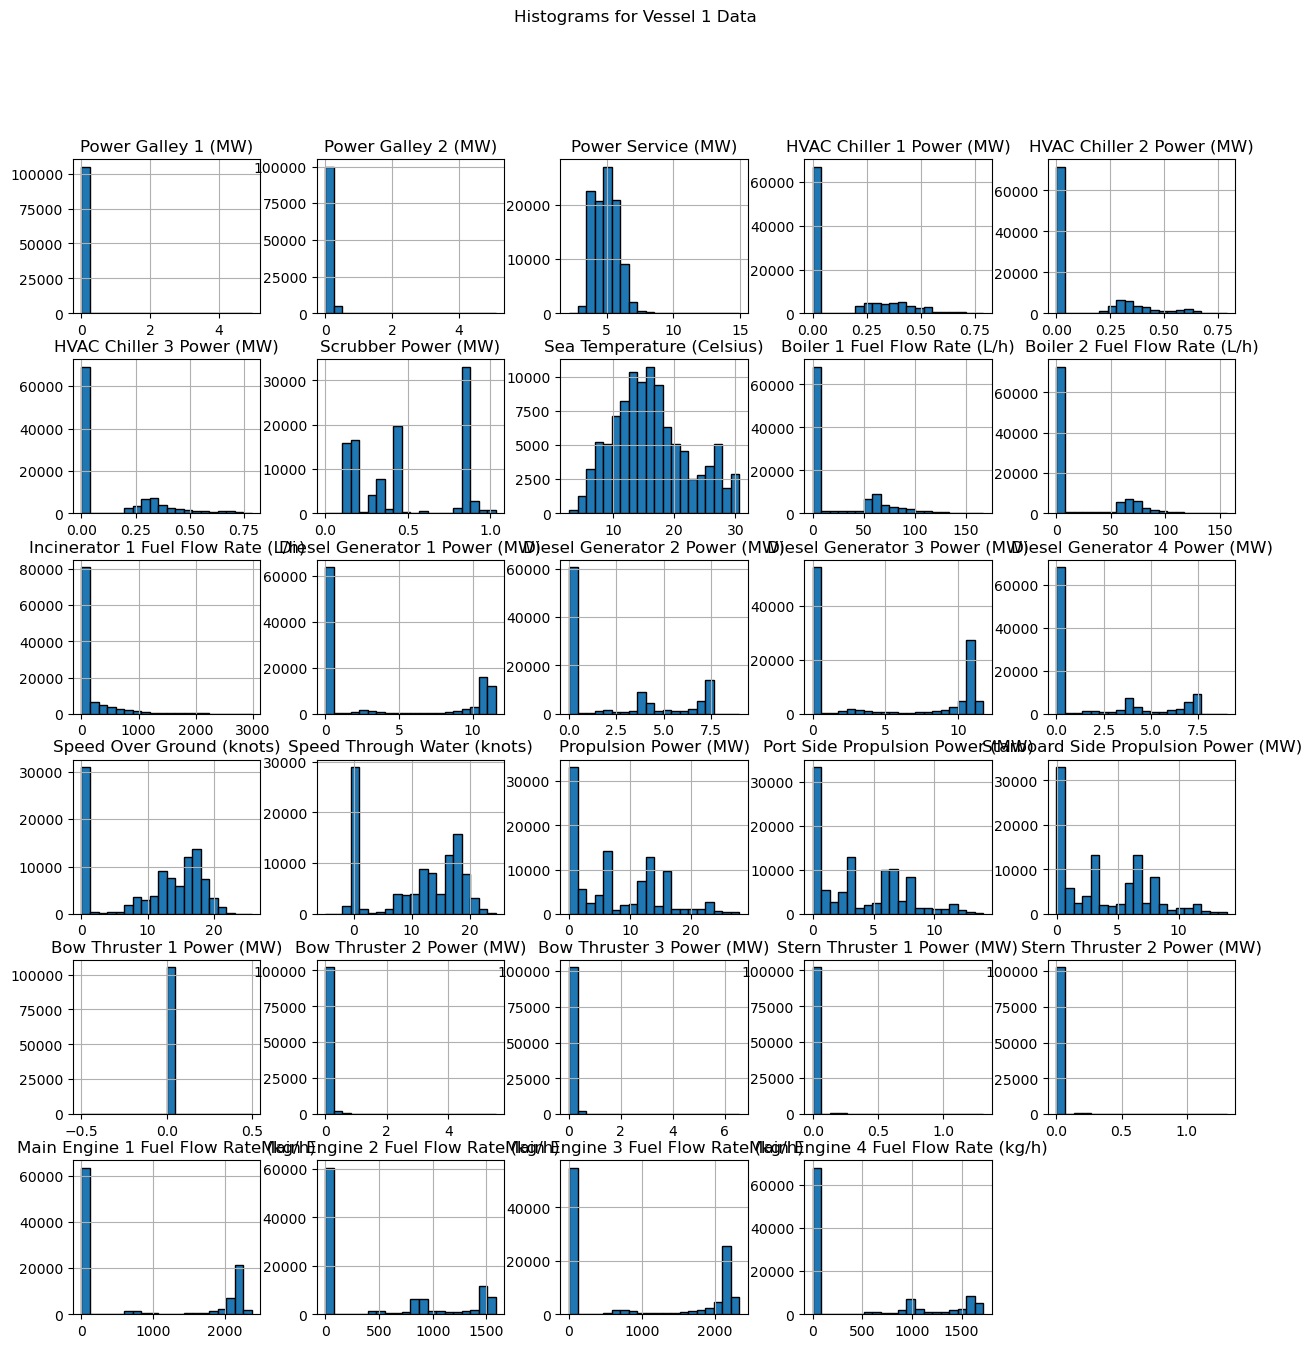

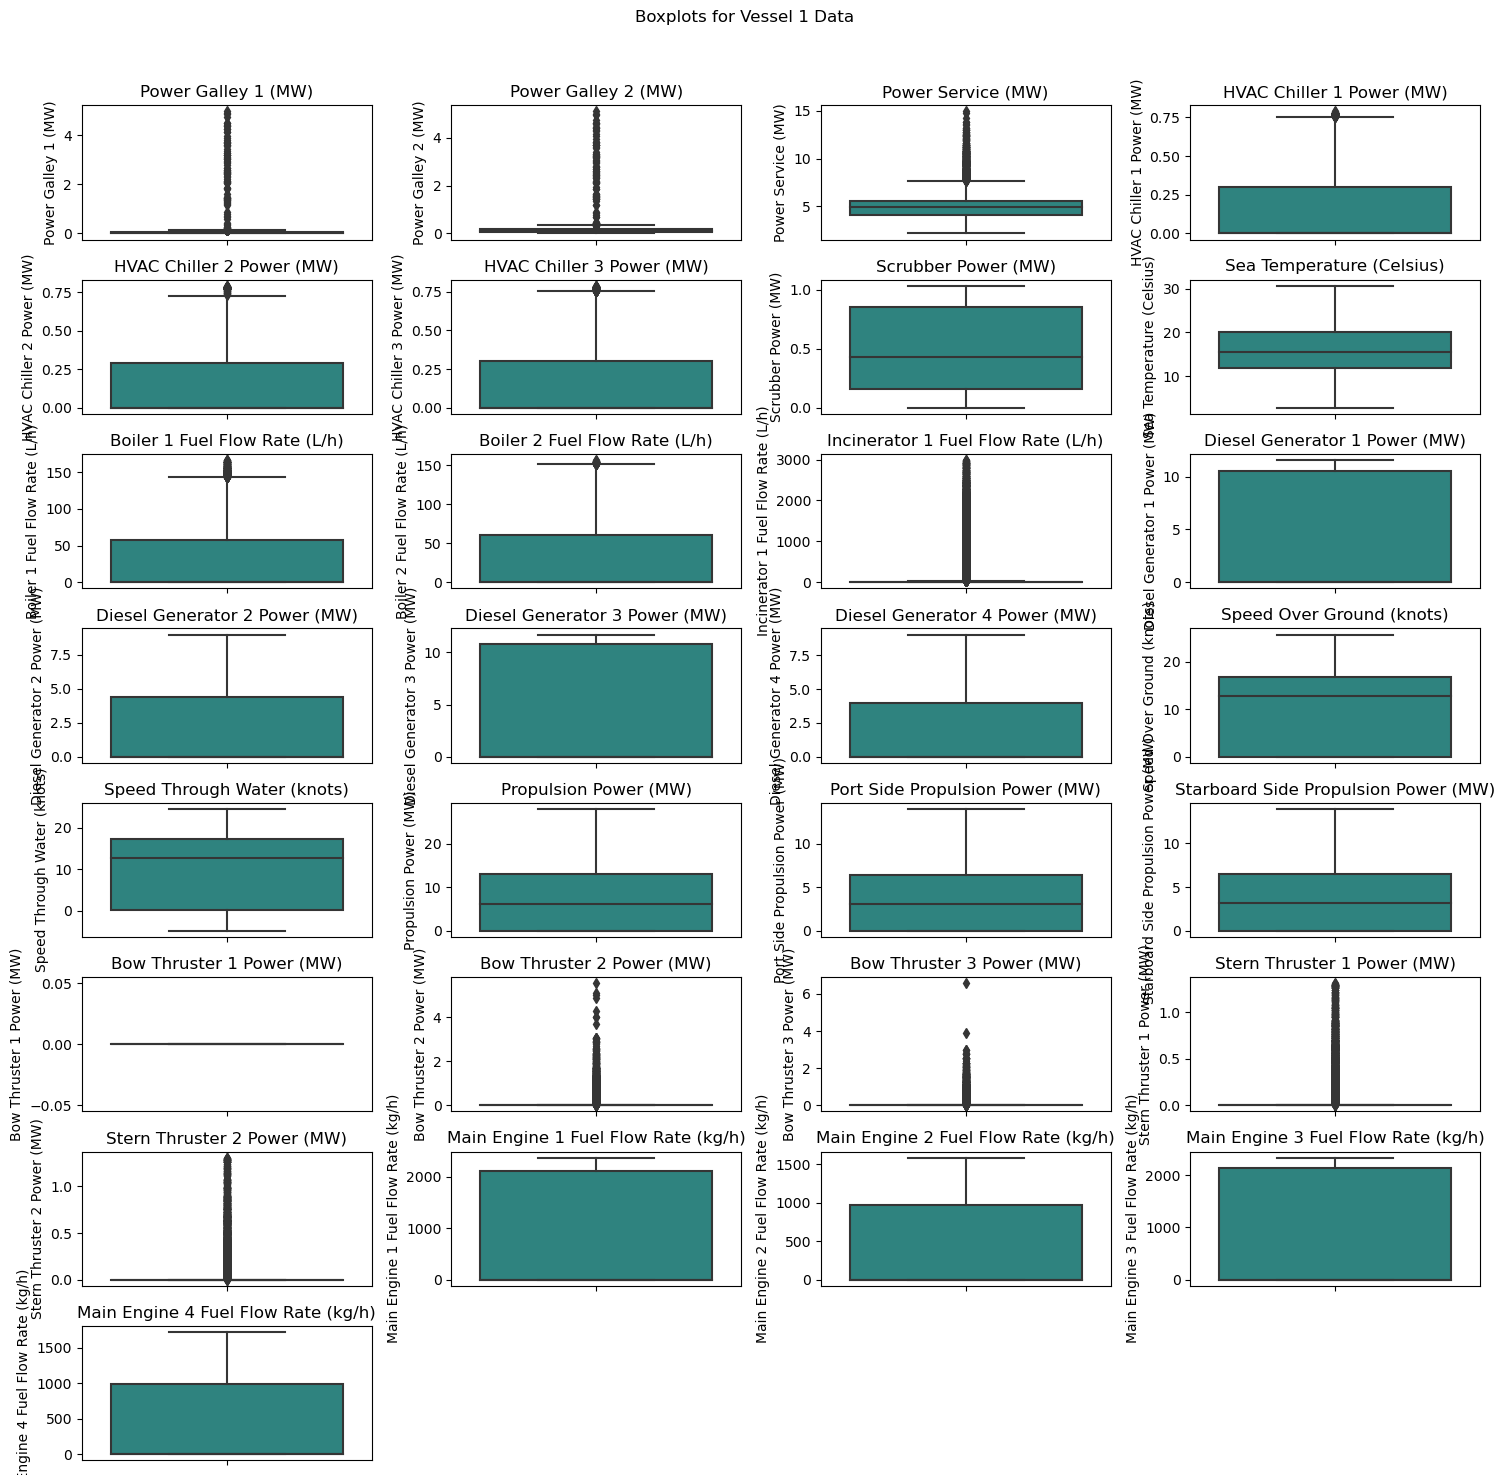

c:\Users\jeeva\OneDrive\Documents\sample_repo\sample_repo_for_testing\script\utilities.py:69: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.1f', annot_kws={"size": 8})


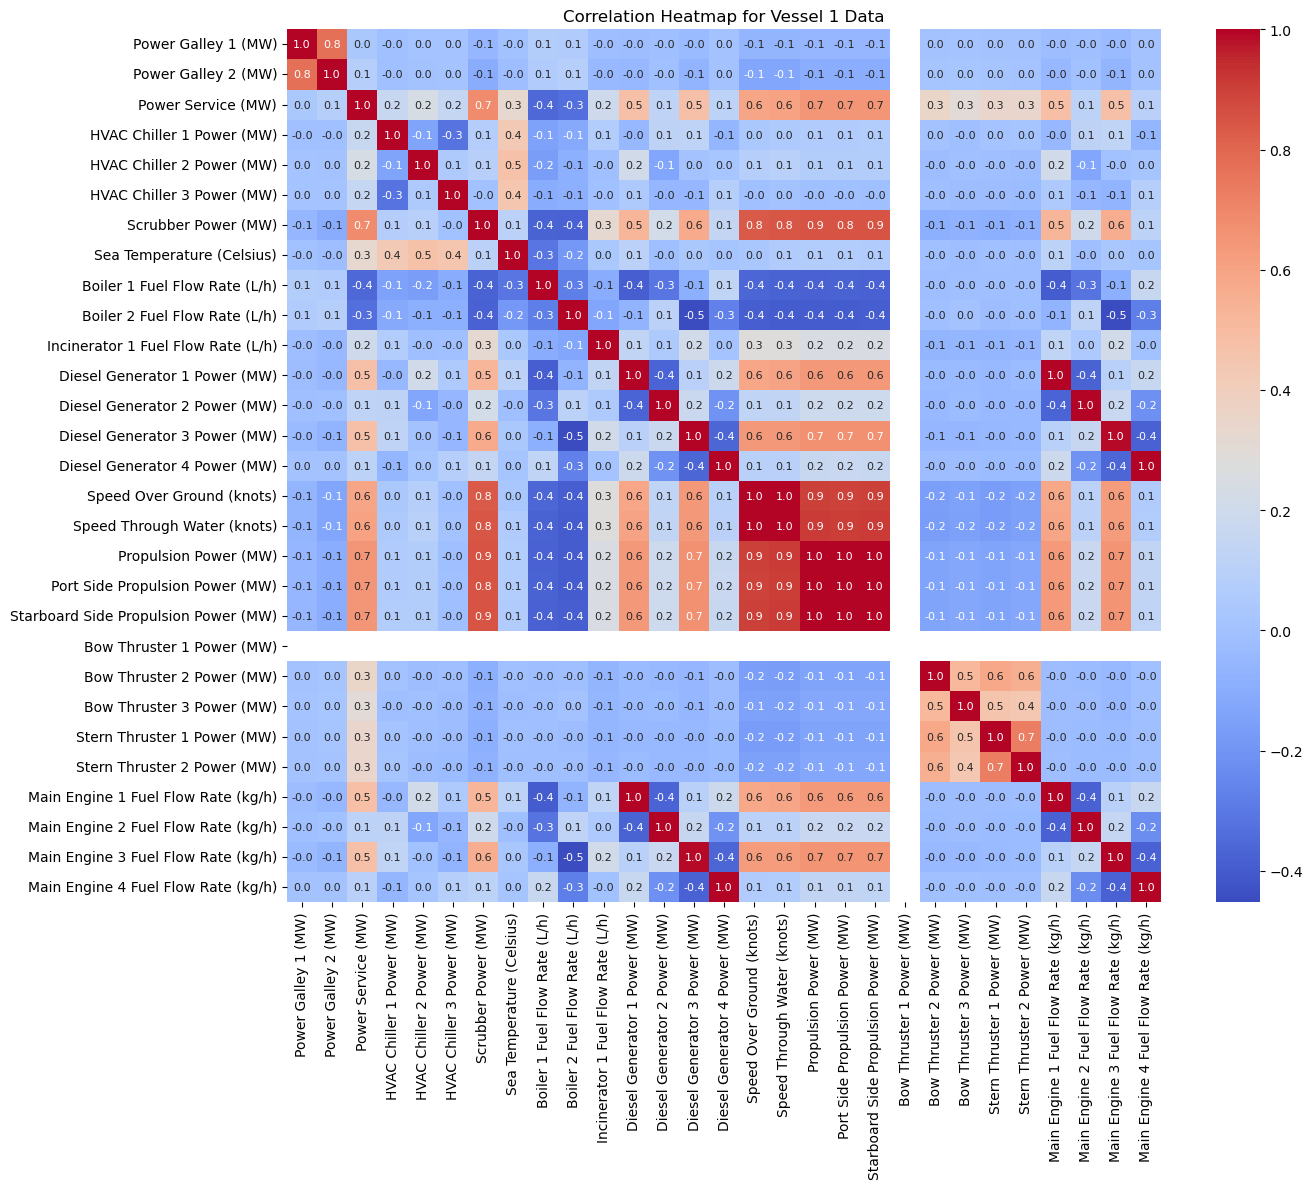

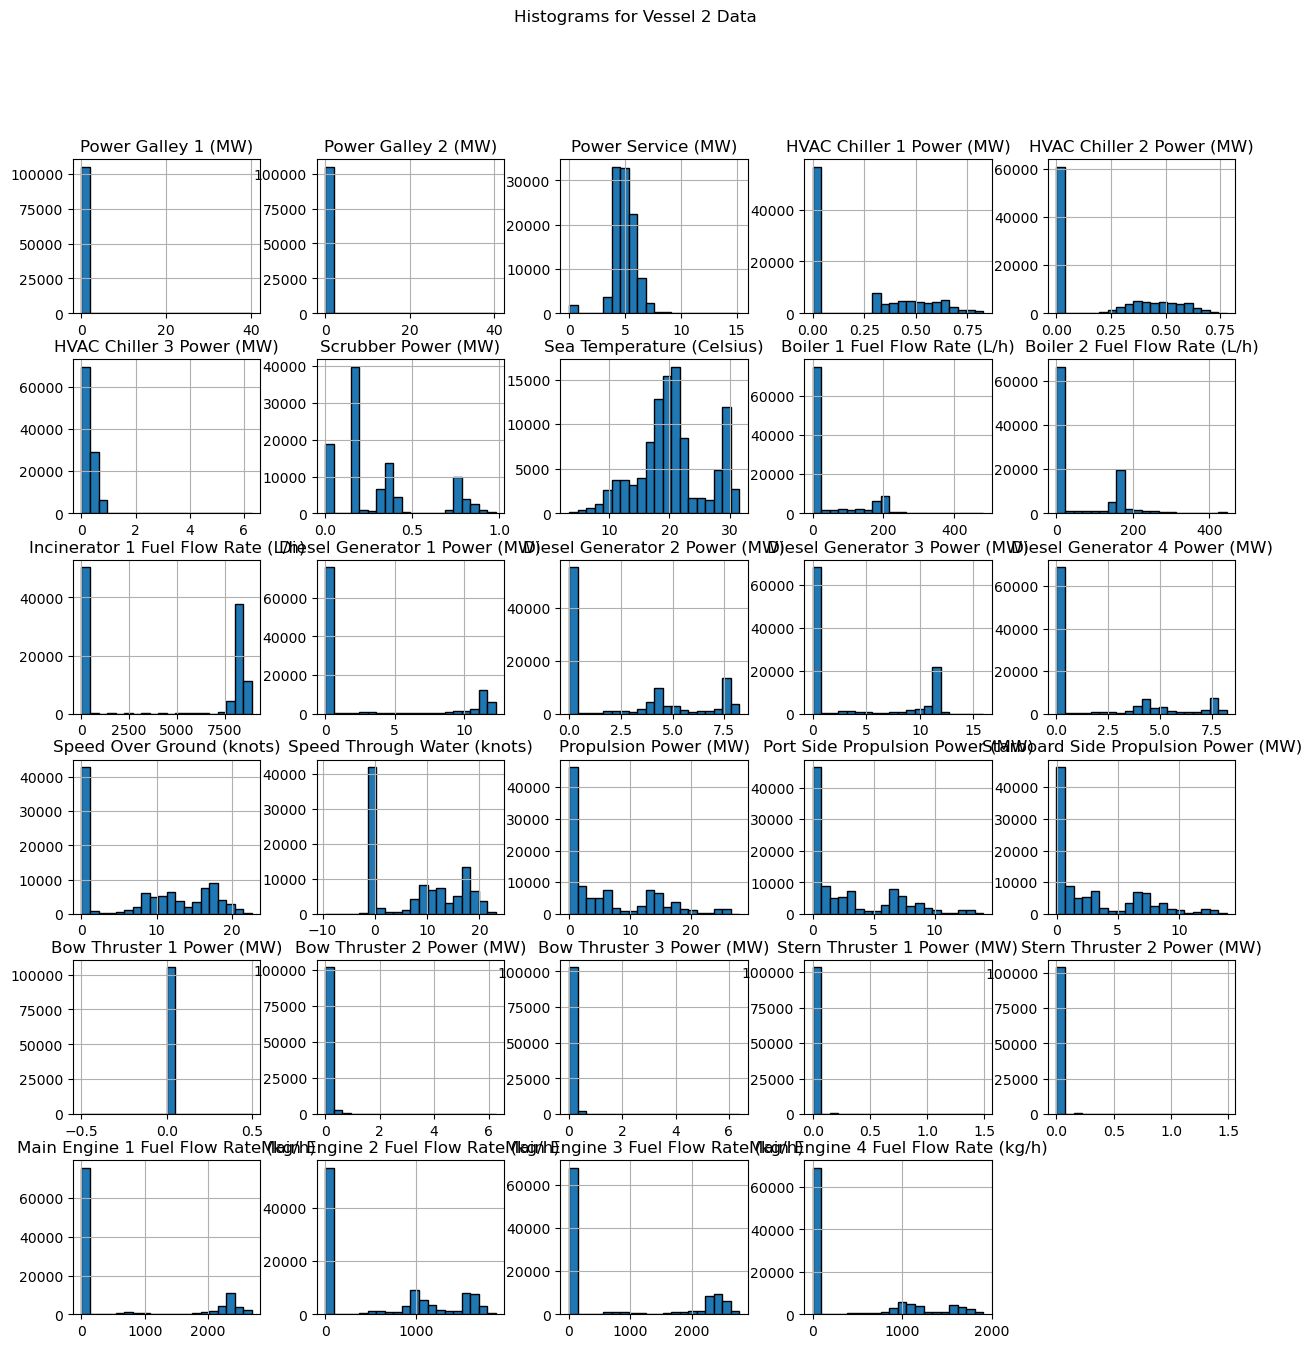

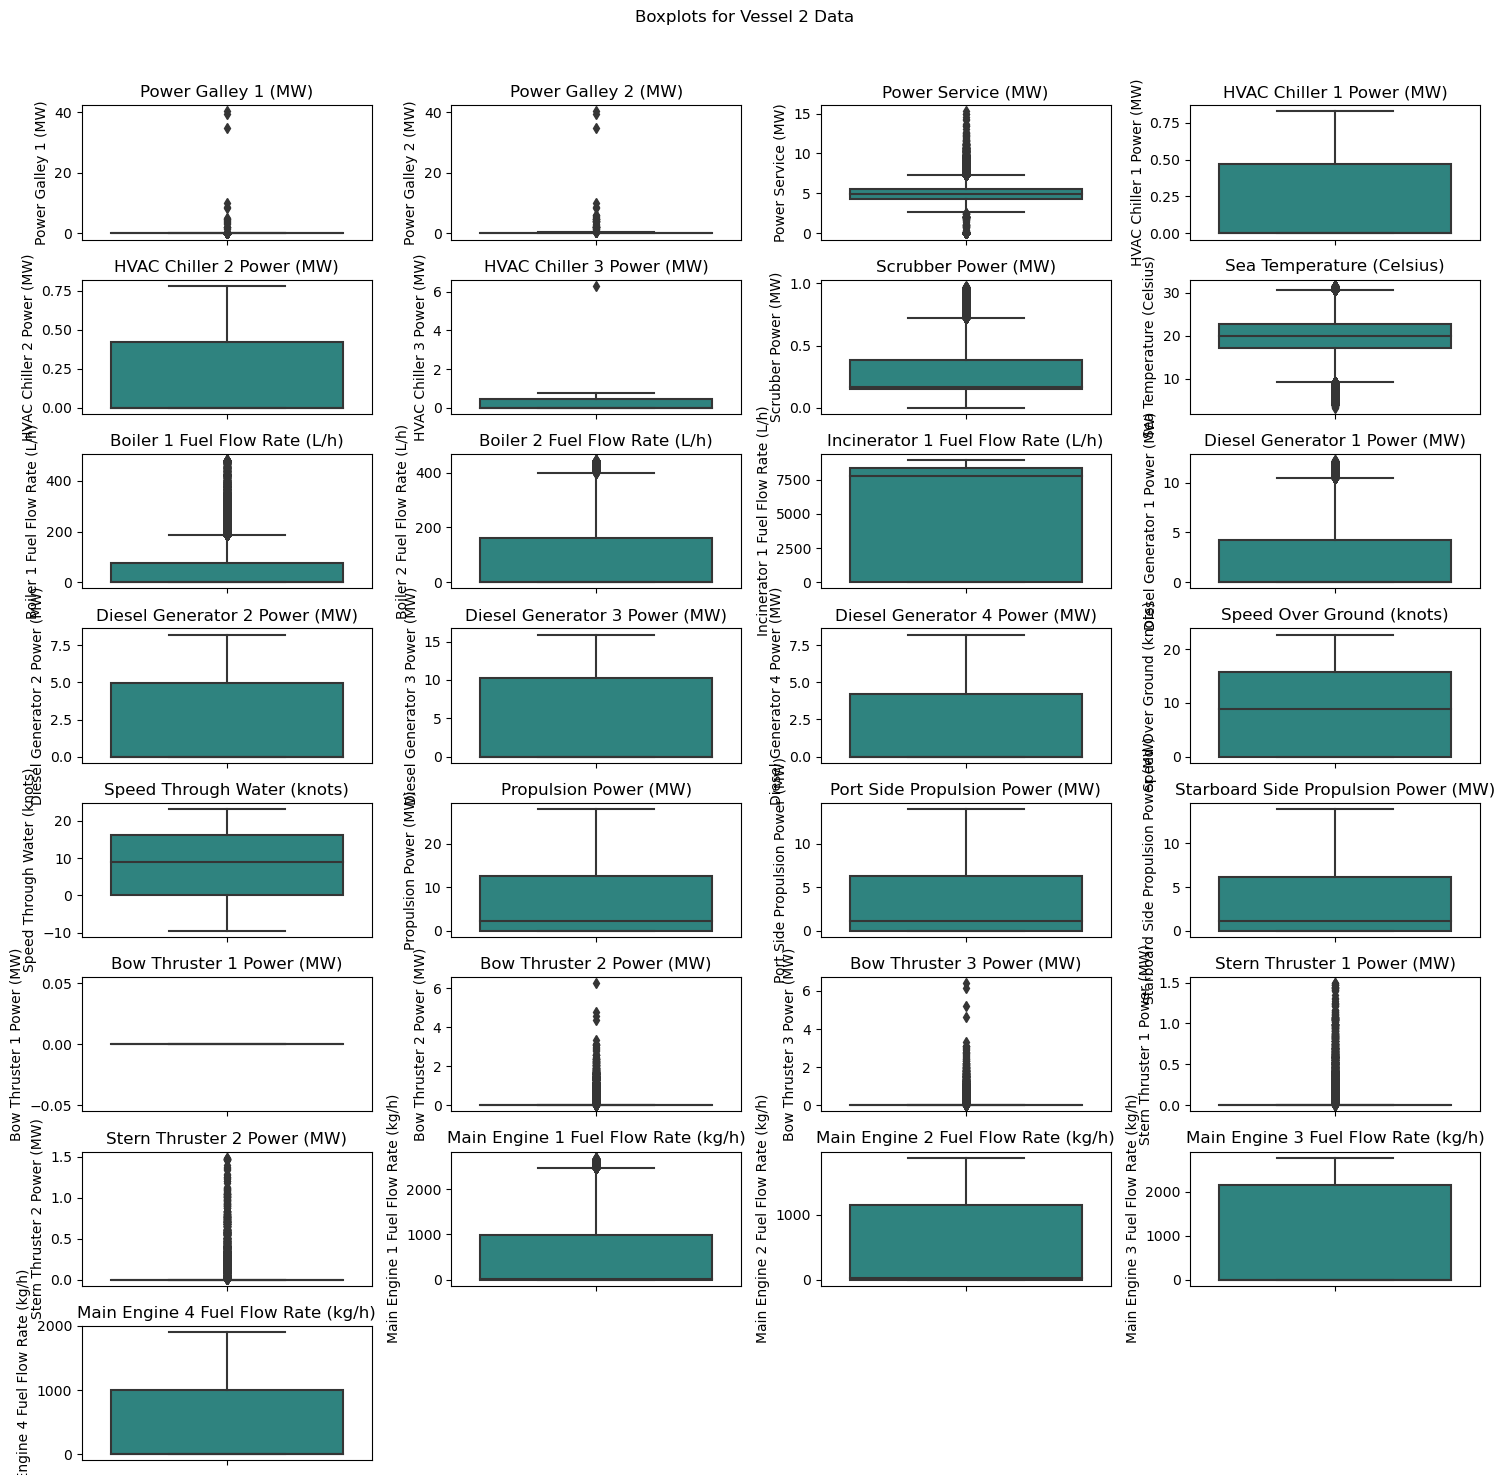

c:\Users\jeeva\OneDrive\Documents\sample_repo\sample_repo_for_testing\script\utilities.py:69: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.1f', annot_kws={"size": 8})


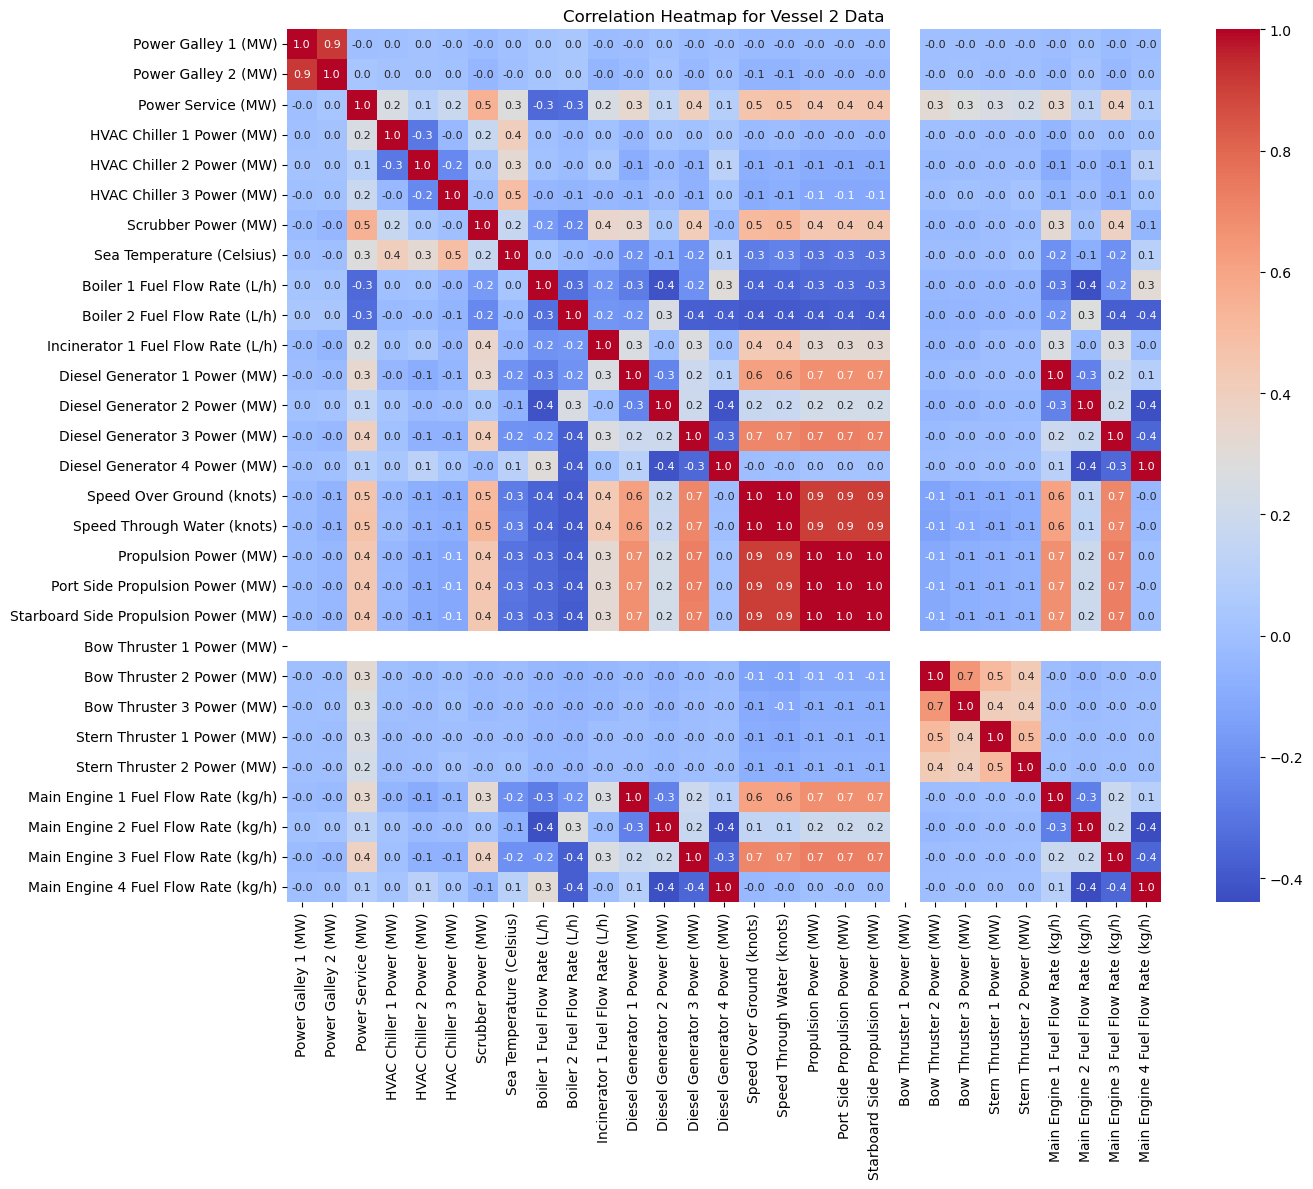

In [2]:
# Plotting for Vessel 1
plot_histograms(vessel1_data_cleaned, 'Histograms for Vessel 1 Data')
plot_boxplots(vessel1_data_cleaned, 'Boxplots for Vessel 1 Data')
plot_correlation_heatmap(vessel1_data_cleaned, 'Correlation Heatmap for Vessel 1 Data')

# Plotting for Vessel 2
plot_histograms(vessel2_data_cleaned, 'Histograms for Vessel 2 Data')
plot_boxplots(vessel2_data_cleaned, 'Boxplots for Vessel 2 Data')
plot_correlation_heatmap(vessel2_data_cleaned, 'Correlation Heatmap for Vessel 2 Data')